In [28]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

**setup kaggle credentials**

In [29]:
data=pd.read_csv("../data/raw/IMDB Dataset.csv")

In [30]:
data.shape

(50000, 2)

In [31]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [32]:
data.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [33]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [34]:
sentiment_map = {"positive": 1, "negative": 0}

data["new_c"] = data["sentiment"].map(sentiment_map).fillna(-1) #add .fillna to handle values not in the map.


In [35]:
# data.replace({"sentiment" : {"positive":1 , "negative":0}}, inplace=True)

In [36]:
data.head()

,review,sentiment,new_c
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [37]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [38]:
data.head(10)

,review,sentiment,new_c
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
5,"Probably my all-time favorite movie, a story o...",positive,1
6,I sure would like to see a resurrection of a u...,positive,1
7,"This show was an amazing, fresh & innovative i...",negative,0
8,Encouraged by the positive comments about this...,negative,0
9,If you like original gut wrenching laughter yo...,positive,1


In [39]:
#split
train_data, test_data =train_test_split(data, test_size=0.2, random_state=42)

In [40]:
train_data.shape

(40000, 3)

In [41]:
test_data.shape

(10000, 3)

**Tokenize Text data**

In [42]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [43]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [44]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [45]:
Y_test=test_data["sentiment"]

In [46]:
Y_train=train_data["sentiment"]

In [47]:
print(Y_test)
print(Y_train)

33553    positive
9427     positive
199      negative
12447    positive
39489    negative
           ...   
28567    negative
25079    positive
18707    positive
15200    negative
5857     positive
Name: sentiment, Length: 10000, dtype: object
39087    negative
30893    negative
45278    positive
16398    negative
13653    negative
           ...   
11284    positive
44732    positive
38158    negative
860      positive
15795    positive
Name: sentiment, Length: 40000, dtype: object


In [48]:
Y_train = Y_train.replace({"positive": 1, "negative": 0})
Y_test = Y_test.replace({"positive": 1, "negative": 0})

C:\Users\Aditya Raj\AppData\Local\Temp\ipykernel_26612\753937383.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train = Y_train.replace({"positive": 1, "negative": 0})
C:\Users\Aditya Raj\AppData\Local\Temp\ipykernel_26612\753937383.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test = Y_test.replace({"positive": 1, "negative": 0})


**Now, build the model**

In [49]:
model = Sequential()
model.add(Input(shape=(200,))) # Explicit input layer
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [51]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Train the model**

In [52]:
model.fit(X_train, Y_train, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 138ms/step - accuracy: 0.7171 - loss: 0.5392 - val_accuracy: 0.8441 - val_loss: 0.3682
Epoch 2/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 133ms/step - accuracy: 0.8500 - loss: 0.3581 - val_accuracy: 0.8577 - val_loss: 0.3400
Epoch 3/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 125ms/step - accuracy: 0.8726 - loss: 0.3124 - val_accuracy: 0.8515 - val_loss: 0.3553
Epoch 4/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.8966 - loss: 0.2610 - val_accuracy: 0.8658 - val_loss: 0.3727
Epoch 5/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 127ms/step - accuracy: 0.9002 - loss: 0.2459 - val_accuracy: 0.8658 - val_loss: 0.3247
Epoch 6/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 124ms/step - accuracy: 0.9247 - loss: 0.1990 - val_accuracy: 0.8741 - val_loss: 0.3214


**Model evaluation**

In [53]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8786 - loss: 0.3053
Test Loss: 0.30183136463165283
Test Accuracy: 0.8805000185966492


# Neural Net

In [54]:
import joblib
import os
path = '../models/saved_models/'
if not os.path.exists(path):
    os.makedirs(path)

path=os.path.join(path, 'Neural_Net.pkl')

# Save the model
joblib.dump(model, path)
# Save the tokenizer
joblib.dump(tokenizer, '../models/tokenizer.pkl')

['../models/tokenizer.pkl']

# Logistic Regression

In [55]:
import joblib
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")  
log_reg.fit(X_train, Y_train)
joblib.dump(log_reg, "../models/saved_models/logistic_regression.pkl")

['../models/saved_models/logistic_regression.pkl']

# Linear SVC

In [56]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC()
model_svc.fit(X_train, Y_train)
joblib.dump(model_svc, "../models/saved_models/linear_svc.pkl")

['../models/saved_models/linear_svc.pkl']

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
joblib.dump(model_rf, "../models/saved_models/random_forest.pkl")

['../models/saved_models/random_forest.pkl']

**Building a Predictive System**

In [58]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

**Let's take some example to check function**

In [59]:
review1="movie is totally bad"
sentiment = predict_sentiment(review1)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
sentiment= negative


In [60]:
review2="only some part of movie is not good"
sentiment = predict_sentiment(review2)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
sentiment= negative


In [61]:
review3="only some part of movie is not bad"
sentiment = predict_sentiment(review3)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
sentiment= negative


In [62]:
review4="only some part of movie is perfect"
sentiment = predict_sentiment(review4)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
sentiment= positive


In [63]:
review5="whole movie was ok"
sentiment = predict_sentiment(review5)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
sentiment= negative


In [64]:
review5="everything is perfect"
sentiment = predict_sentiment(review5)
print("sentiment=",sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
sentiment= positive


# Comparing Accuracy & Precision

In [71]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Check if it's a Neural Network (TensorFlow/Keras)
    if isinstance(y_pred, np.ndarray):  # Neural Net outputs numpy array
        if len(y_pred.shape) == 2 and y_pred.shape[1] > 1:  
            # Multi-class classification (Softmax activation)
            y_pred = np.argmax(y_pred, axis=1)
        else:
            # Binary classification (Sigmoid activation)
            y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")

    return accuracy, precision


# Load models and compare
models = {
    "Linear SVC": joblib.load("../models/saved_models/linear_svc.pkl"),
    "Random Forest": joblib.load("../models/saved_models/random_forest.pkl"),
    "Neural Network": joblib.load("../models/saved_models/Neural_Net.pkl"),
    "Logistic Regression": joblib.load("../models/saved_models/logistic_regression.pkl"),
}

for name, model in models.items():
    acc, prec = evaluate_model(model, X_test, Y_test)
    print(f"{name}: Accuracy = {acc:.4f}, Precision = {prec:.4f}")


Linear SVC: Accuracy = 0.5131, Precision = 0.5136
Random Forest: Accuracy = 0.5388, Precision = 0.5394
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Neural Network: Accuracy = 0.8805, Precision = 0.8805
Logistic Regression: Accuracy = 0.5131, Precision = 0.5136


# Visualizing Performance

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix function for Neural model
def plot_confusion_matrix_neural(model, X_test, y_test, title):
    # Predict probabilities for the neural network model
    y_pred_probs = model.predict(X_test)
    #If Y_test is one hot encoded.
    Y_test_decoded = np.argmax(y_test, axis = 1)
    # Convert probabilities to class predictions:
    y_pred = np.argmax(y_pred_probs, axis=1)
    cm = confusion_matrix(Y_test_decoded, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


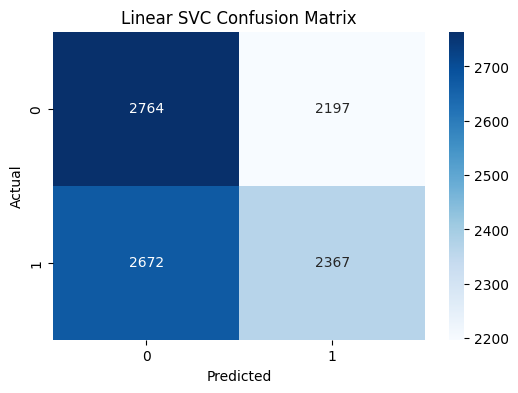

In [67]:
# Plot for Linear SVC
plot_confusion_matrix(models["Linear SVC"], X_test, Y_test, "Linear SVC Confusion Matrix")

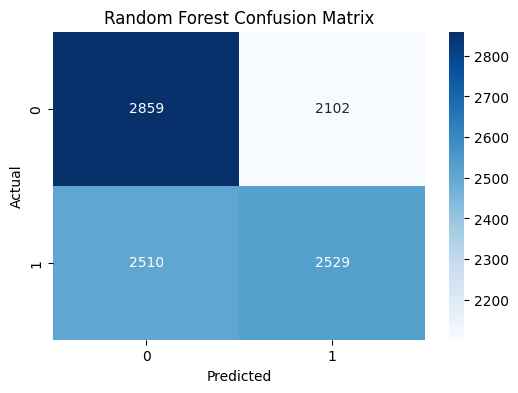

In [68]:
# Plot for Random Forest
plot_confusion_matrix(models["Random Forest"], X_test, Y_test, "Random Forest Confusion Matrix")

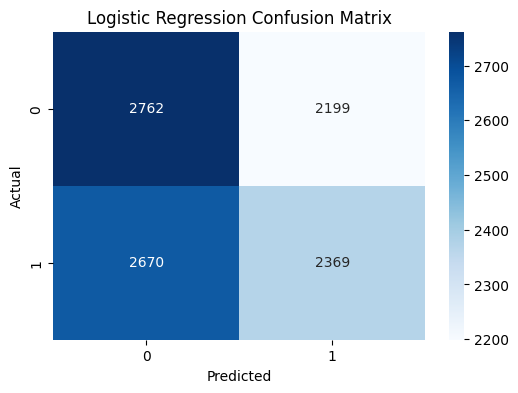

In [72]:
# Plot for Logistic Regression
plot_confusion_matrix(models["Logistic Regression"], X_test, Y_test, "Logistic Regression Confusion Matrix")

In [86]:
# Plot for Neural Network
plot_confusion_matrix_neural(models["Neural Network"], X_test, Y_test, "Neural Network Confusion Matrix")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


ValueError: `axis` must be fewer than the number of dimensions (1)